In this notebook I am gonna work on the plots generated for the poster. Step:

- Aggregate the data in three different arrays:
    - total latency
    - tracking latency
    - display latency
    
- plto the figures
    - radar (the best and worst cases must be observable)
    - best and worst latency histograms
    - violin blot (complementing the radar plots)

In [1]:
import glob
from os import path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Example of how to read individual data

### Total Latency

In [ ]:
import sys
sys.path.append('../Pipeline/')
import plot_latency_hist as plh

In [ ]:
filename = 's37_060318'
df = pd.read_csv('..//Measurements//' + filename + '.csv')

In [ ]:
data = plh.plot_latency_hist(df, return_data=True).values.reshape(-1,1)

In [ ]:
sns.distplot(data)
plt.show()

### Tracking Latency

### Display Latency

In [ ]:
import sys
sys.path.append('../Pipeline/')
import plot_disp_latency_hist as plh_disp

In [ ]:
filename = 's01_120318'
df = pd.read_csv('..//Measurements//disp_latency//' + filename + '.csv')

In [ ]:
data = plh_disp.plot_disp_latency_hist(df, return_data=True).values.reshape(-1,1)

In [ ]:
sns.distplot(data)
plt.show()

----

## Reading all the .csv files in a specific path

In [ ]:
file_path = r'../Measurements/*.csv'

In [ ]:
ff = glob.glob(file_path)

In [ ]:
ff

### Total Latency data aggregation

In [ ]:
data_latency_agg = []
for ind, fname in enumerate(glob.glob(r'../Measurements/*.csv')):
    print(ind, fname, path.splitext(path.basename(fname))[0])
    df = pd.read_csv(fname)
    data_latency_agg.append(plh.plot_latency_hist(df, return_data=True).values.reshape(-1,1))

In [ ]:
len(data_latency_agg[1])

In [ ]:
sns.distplot(data_latency_agg[25])

# Generating the figures for the total latency

## Define the path

In [ ]:
file_path = glob.glob(r'../Measurements/*.csv')

### Samples aggregated dataframe

In [ ]:
samples_df = pd.DataFrame()

for ind, fname in enumerate(file_path):
    print(ind, fname, path.splitext(path.basename(fname))[0])

    # add the session column to this dataframe
    df = pd.read_csv(fname)
    df['session'] = [ind] * len(df)

    # put this in the master dataframe
    samples_df = pd.concat([samples_df, df], axis=0)

In [ ]:
# samples_df

### Trials aggregated latency and session values

In [ ]:
latency_df = pd.DataFrame()

for ind, fname in enumerate(file_path):
    print(ind, fname, path.splitext(path.basename(fname))[0])

    # create a dataframe of the latency and add it to the other dataframe
    df = pd.read_csv(fname)
    data_latency = plh.plot_latency_hist(df, return_data=True).values.reshape(-1)        

    dd = []
    dd.append(data_latency)        
    dd.append([ind] * len(data_latency))
    dd.append(np.arange(1, len(data_latency)+1))
    dd = np.array(dd).transpose()

    df_lat = pd.DataFrame(dd, 
                          columns=['latency', 'session', 'Trial'])
    latency_df = pd.concat([latency_df, df_lat], axis=0)
    latency_df.session = latency_df.session.astype(int)
    latency_df.Trial = latency_df.Trial.astype(int)

In [ ]:
sns.distplot(latency_df.latency[latency_df.session==0])

### Trying merge the two Dataframe

In [ ]:
result = pd.merge(latency_df, samples_df, how='left', on=['session', 'Trial'])

In [ ]:
result.head()

In [ ]:
latency_df.head()

## Using seaborn to plot stuff from pandas dataframe

In [ ]:
df = result.groupby(('session', 'Trial')).latency.mean().reset_index()
df.head()

In [ ]:
sns.distplot(df.latency[df.session==0])

In [ ]:
plt.figure(figsize=(20,5))
sns.violinplot(x=df.session, y=df.latency)

In [ ]:
new_df = df[df.session % 2 == 0]

In [ ]:
plt.figure(figsize=(20,5))
sns.violinplot(x=new_df.session, y=new_df.latency)

### Two-sided violin plot, each side for different display frame rate

let's divide the data into two

In [ ]:
result['FPS'] = [0] * len(result)

In [ ]:
result.FPS[result.session<18] = 120
result.FPS[result.session>=18] = 240
result.session[result.session>=18] -= 18

In [ ]:
plt.figure(figsize=(15,5))
sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x="session", y="latency", hue="FPS", data=result, split=True,
               inner="quart", palette={120: "b", 240: "y"})
sns.despine(left=True)

# Figures for Tracking Delay

In [18]:
def give_me_latency(data):

    data.Time -= data.Time.min()
    data.Time *= 1000
    data.index = data.Time # change time to ms

    # data processing
    data['TrialTime'] = data.groupby('Trial').Time.apply(lambda x: x-x.min())
    data.Position -= data.Position.min()
    threshold = (data.Position.max() - data.Position.min()) / 2
    data['FrameOn'] = data['Position'] > threshold

    resp_on = data[((data['LED_state'] == 0) & (data['FrameOn'] == False)) | ((data['LED_state'] == 1) & (data['FrameOn'] == True))]
    latency = resp_on.groupby('Trial').TrialTime.min()
    
    return latency

Data Path

In [19]:
file_path = glob.glob(r'../Measurements/tracking_latency/*.csv')

Getting the sampls DataFrame

In [20]:
samples_df = pd.DataFrame()

for ind, fname in enumerate(file_path):
    print(ind, fname, path.splitext(path.basename(fname))[0])

    # add the session column to this dataframe
    df = pd.read_csv(fname)
    df['session'] = [ind] * len(df)

    # put this in the master dataframe
    samples_df = pd.concat([samples_df, df], axis=0)

0 ../Measurements/tracking_latency\s01_210318.csv s01_210318
1 ../Measurements/tracking_latency\s02_210318.csv s02_210318
2 ../Measurements/tracking_latency\s03_210318.csv s03_210318
3 ../Measurements/tracking_latency\s04_210318.csv s04_210318
4 ../Measurements/tracking_latency\s05_210318.csv s05_210318
5 ../Measurements/tracking_latency\s06_210318.csv s06_210318
6 ../Measurements/tracking_latency\s07_210318.csv s07_210318
7 ../Measurements/tracking_latency\s08_210318.csv s08_210318
8 ../Measurements/tracking_latency\s09_210318.csv s09_210318
9 ../Measurements/tracking_latency\s10_210318.csv s10_210318
10 ../Measurements/tracking_latency\s11_210318.csv s11_210318
11 ../Measurements/tracking_latency\s12_210318.csv s12_210318
12 ../Measurements/tracking_latency\s13_210318.csv s13_210318
13 ../Measurements/tracking_latency\s14_210318.csv s14_210318
14 ../Measurements/tracking_latency\s15_210318.csv s15_210318
15 ../Measurements/tracking_latency\s16_210318.csv s16_210318


Getting Latency DataFrame

In [21]:
latency_df = pd.DataFrame()
for ind, fname in enumerate(file_path):
    print(ind, fname, path.splitext(path.basename(fname))[0])

    # create a dataframe of the latency and add it to the other dataframe
    df = pd.read_csv(fname)
    data_latency = give_me_latency(df).values.reshape(-1)        

    dd = []
    dd.append(data_latency)        
    dd.append([ind] * len(data_latency))
    dd.append(np.arange(1, len(data_latency)+1))
    dd = np.array(dd).transpose()

    df_lat = pd.DataFrame(dd, 
                          columns=['latency', 'session', 'Trial'])
    latency_df = pd.concat([latency_df, df_lat], axis=0)
    latency_df.session = latency_df.session.astype(int)
    latency_df.Trial = latency_df.Trial.astype(int)

0 ../Measurements/tracking_latency\s01_210318.csv s01_210318
1 ../Measurements/tracking_latency\s02_210318.csv s02_210318
2 ../Measurements/tracking_latency\s03_210318.csv s03_210318
3 ../Measurements/tracking_latency\s04_210318.csv s04_210318
4 ../Measurements/tracking_latency\s05_210318.csv s05_210318
5 ../Measurements/tracking_latency\s06_210318.csv s06_210318
6 ../Measurements/tracking_latency\s07_210318.csv s07_210318
7 ../Measurements/tracking_latency\s08_210318.csv s08_210318
8 ../Measurements/tracking_latency\s09_210318.csv s09_210318
9 ../Measurements/tracking_latency\s10_210318.csv s10_210318
10 ../Measurements/tracking_latency\s11_210318.csv s11_210318
11 ../Measurements/tracking_latency\s12_210318.csv s12_210318
12 ../Measurements/tracking_latency\s13_210318.csv s13_210318
13 ../Measurements/tracking_latency\s14_210318.csv s14_210318
14 ../Measurements/tracking_latency\s15_210318.csv s15_210318
15 ../Measurements/tracking_latency\s16_210318.csv s16_210318


### Violin Plot

[Text(0,0.5,'Delay (ms)'), Text(0.5,0,'Sessions')]

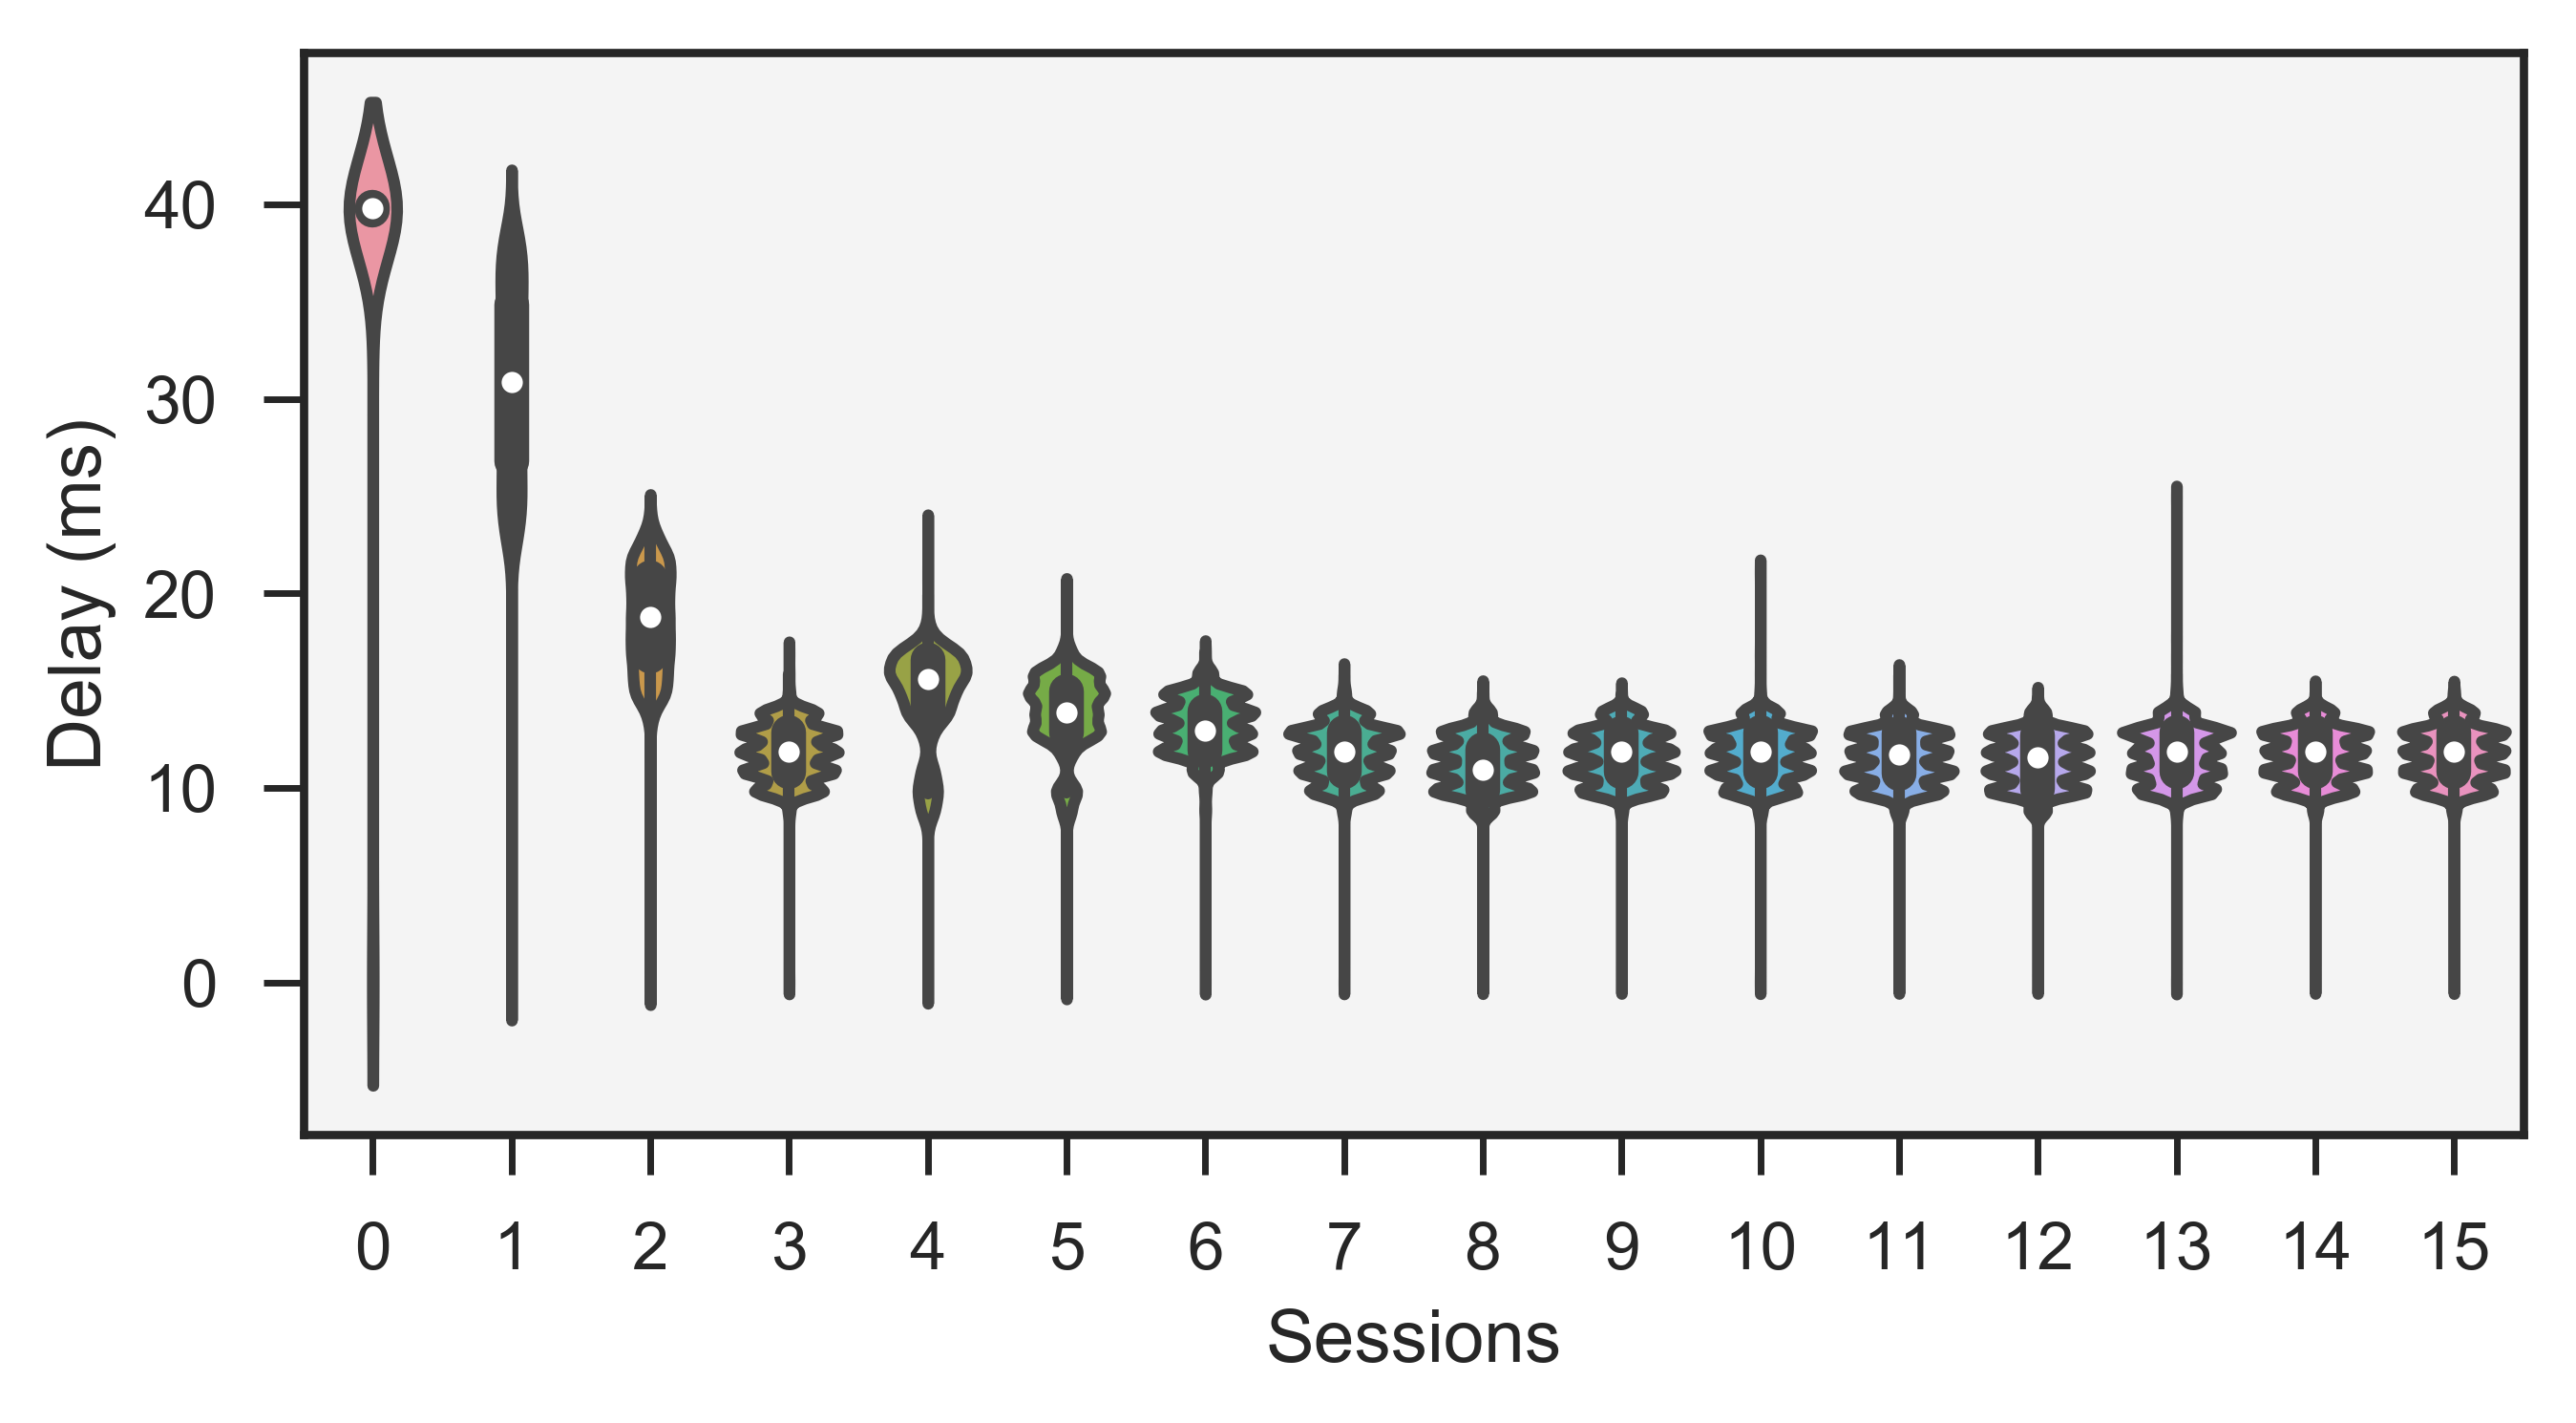

In [22]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=500)
ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((0.8, 0.8, 0.8, .2))

sns.violinplot(x=latency_df.session, y=latency_df.latency).set(xlabel='Sessions', ylabel='Delay (ms)')

# plt.savefig('fig_total_violin.png')

In [23]:
latency_df['exposure_time'] = [np.nan] * len(latency_df)
latency_df['video_type'] = [np.nan] * len(latency_df)
latency_df['tracking_algorithm'] = [np.nan] * len(latency_df)

In [24]:
# session 4 5 6 7 -> exposure time
latency_df.exposure_time[latency_df.session==4] = 4
latency_df.exposure_time[latency_df.session==5] = 3
latency_df.exposure_time[latency_df.session==6] = 2
latency_df.exposure_time[latency_df.session==7] = .5
latency_df.exposure_time[latency_df.session==8] = .1
# latency_df.exposure_time[~np.in1d(latency_df.session, np.arange(4,9))] = np.nan

c:\users\mohammad bashiri\anaconda3\envs\neuron\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\mohammad bashiri\anaconda3\envs\neuron\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\mohammad bashiri\anaconda3\envs\neuron\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
# session 9 10 11 -> S P O mode
latency_df.video_type[latency_df.session==4] = 'Segment Mode'
latency_df.video_type[latency_df.session==5] = 'Precision Modes'
latency_df.video_type[latency_df.session==6] = 'Object Mode'
# latency_df.video_type[~np.in1d(latency_df.session, np.arange(4,7))] = np.nan

c:\users\mohammad bashiri\anaconda3\envs\neuron\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
# session 7 13 14 15 -> Tracking Algorithm
latency_df.tracking_algorithm[latency_df.session==12] = 1
latency_df.tracking_algorithm[latency_df.session==13] = 2
latency_df.tracking_algorithm[latency_df.session==14] = 3
latency_df.tracking_algorithm[latency_df.session==8] = 4
# latency_df.tracking_algorithm[~np.in1d(latency_df.session, np.arange(12,16))] = np.nan

c:\users\mohammad bashiri\anaconda3\envs\neuron\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\mohammad bashiri\anaconda3\envs\neuron\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\mohammad bashiri\anaconda3\envs\neuron\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [49]:
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'white'}, font_scale=3, font='calibri',
        style="ticks", color_codes=True)

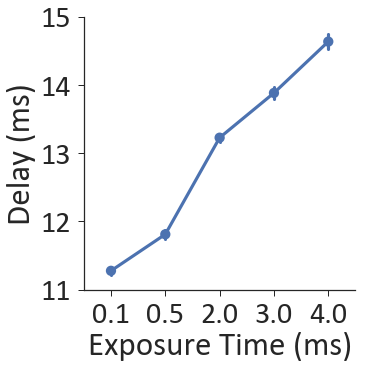

In [50]:
sns.factorplot(data=latency_df, x='exposure_time', y='latency', ci=95, size=6)
plt.xlabel('Exposure Time (ms)')
plt.ylabel('Delay (ms)')
plt.grid('off')
plt.ylim([11, 15])
plt.tight_layout()
plt.savefig('fig_tracking_exptime.png')

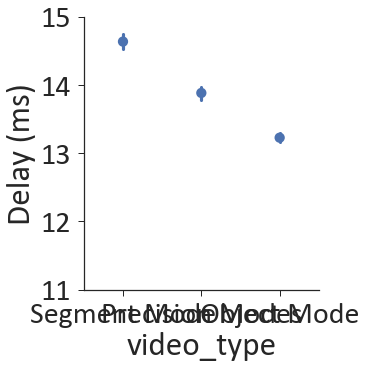

In [51]:
plt.figure(dpi=500)
sns.factorplot(data=latency_df, x='video_type', y='latency', ci=95, linestyles="", size=6)
# plt.xticks([],[])
plt.ylabel('Delay (ms)')
plt.grid('off')
plt.ylim([11, 15])
plt.tight_layout()
plt.savefig('fig_tracking_vidtype.png')

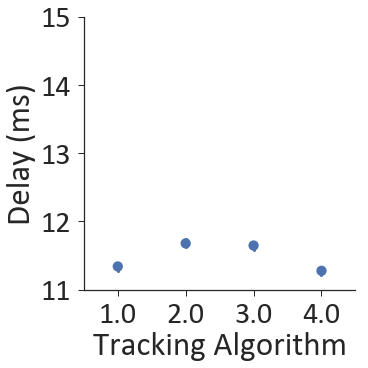

In [52]:
sns.factorplot(data=latency_df, x='tracking_algorithm', y='latency', ci=95, linestyles="", size=6)
plt.xlabel('Tracking Algorithm')
plt.ylabel('Delay (ms)')
plt.grid('off')
plt.ylim([11, 15])
plt.tight_layout()
plt.savefig('fig_tracking_tsckalg.png')

# Figures for Display Delay

In [158]:
import sys
sys.path.append('../Pipeline/')
import plot_disp_latency_hist as plh_disp

Data Path

In [159]:
file_path = glob.glob(r'../Measurements/disp_latency/*.csv')

getting the samples dataframe

In [172]:
samples_df = pd.DataFrame()

for ind, fname in enumerate(file_path):
    print(ind, fname, path.splitext(path.basename(fname))[0])

    # add the session column to this dataframe
    df = pd.read_csv(fname)
    df['session'] = [ind] * len(df)

    # put this in the master dataframe
    samples_df = pd.concat([samples_df, df], axis=0)

0 ../Measurements/disp_latency\s01_120318.csv s01_120318
1 ../Measurements/disp_latency\s02_120318.csv s02_120318
2 ../Measurements/disp_latency\s03_120318.csv s03_120318
3 ../Measurements/disp_latency\s04_120318.csv s04_120318
4 ../Measurements/disp_latency\s05_120318.csv s05_120318


Latency dataframe

In [173]:
latency_df = pd.DataFrame()
FPS = [60, 96, 120, 144, 240]
for ind, fname in enumerate(file_path):
    print(ind, fname, path.splitext(path.basename(fname))[0])

    # create a dataframe of the latency and add it to the other dataframe
    df = pd.read_csv(fname)
    data_latency = plh_disp.plot_disp_latency_hist(df, return_data=True).values.reshape(-1)        

    dd = []
    dd.append(data_latency)        
    dd.append([ind] * len(data_latency))
    dd.append(np.arange(1, len(data_latency)+1))
    dd.append([FPS[ind]] * len(data_latency))
    dd = np.array(dd).transpose()

    df_lat = pd.DataFrame(dd, 
                          columns=['latency', 'session', 'Trial', 'FPS'])
    latency_df = pd.concat([latency_df, df_lat], axis=0)
    latency_df.session = latency_df.session.astype(int)
    latency_df.Trial = latency_df.Trial.astype(int)

0 ../Measurements/disp_latency\s01_120318.csv s01_120318
1 ../Measurements/disp_latency\s02_120318.csv s02_120318
2 ../Measurements/disp_latency\s03_120318.csv s03_120318
3 ../Measurements/disp_latency\s04_120318.csv s04_120318
4 ../Measurements/disp_latency\s05_120318.csv s05_120318


### Violin plot

In [192]:
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'white'}, font_scale=1.5, font='calibri',
        style="ticks", color_codes=True)

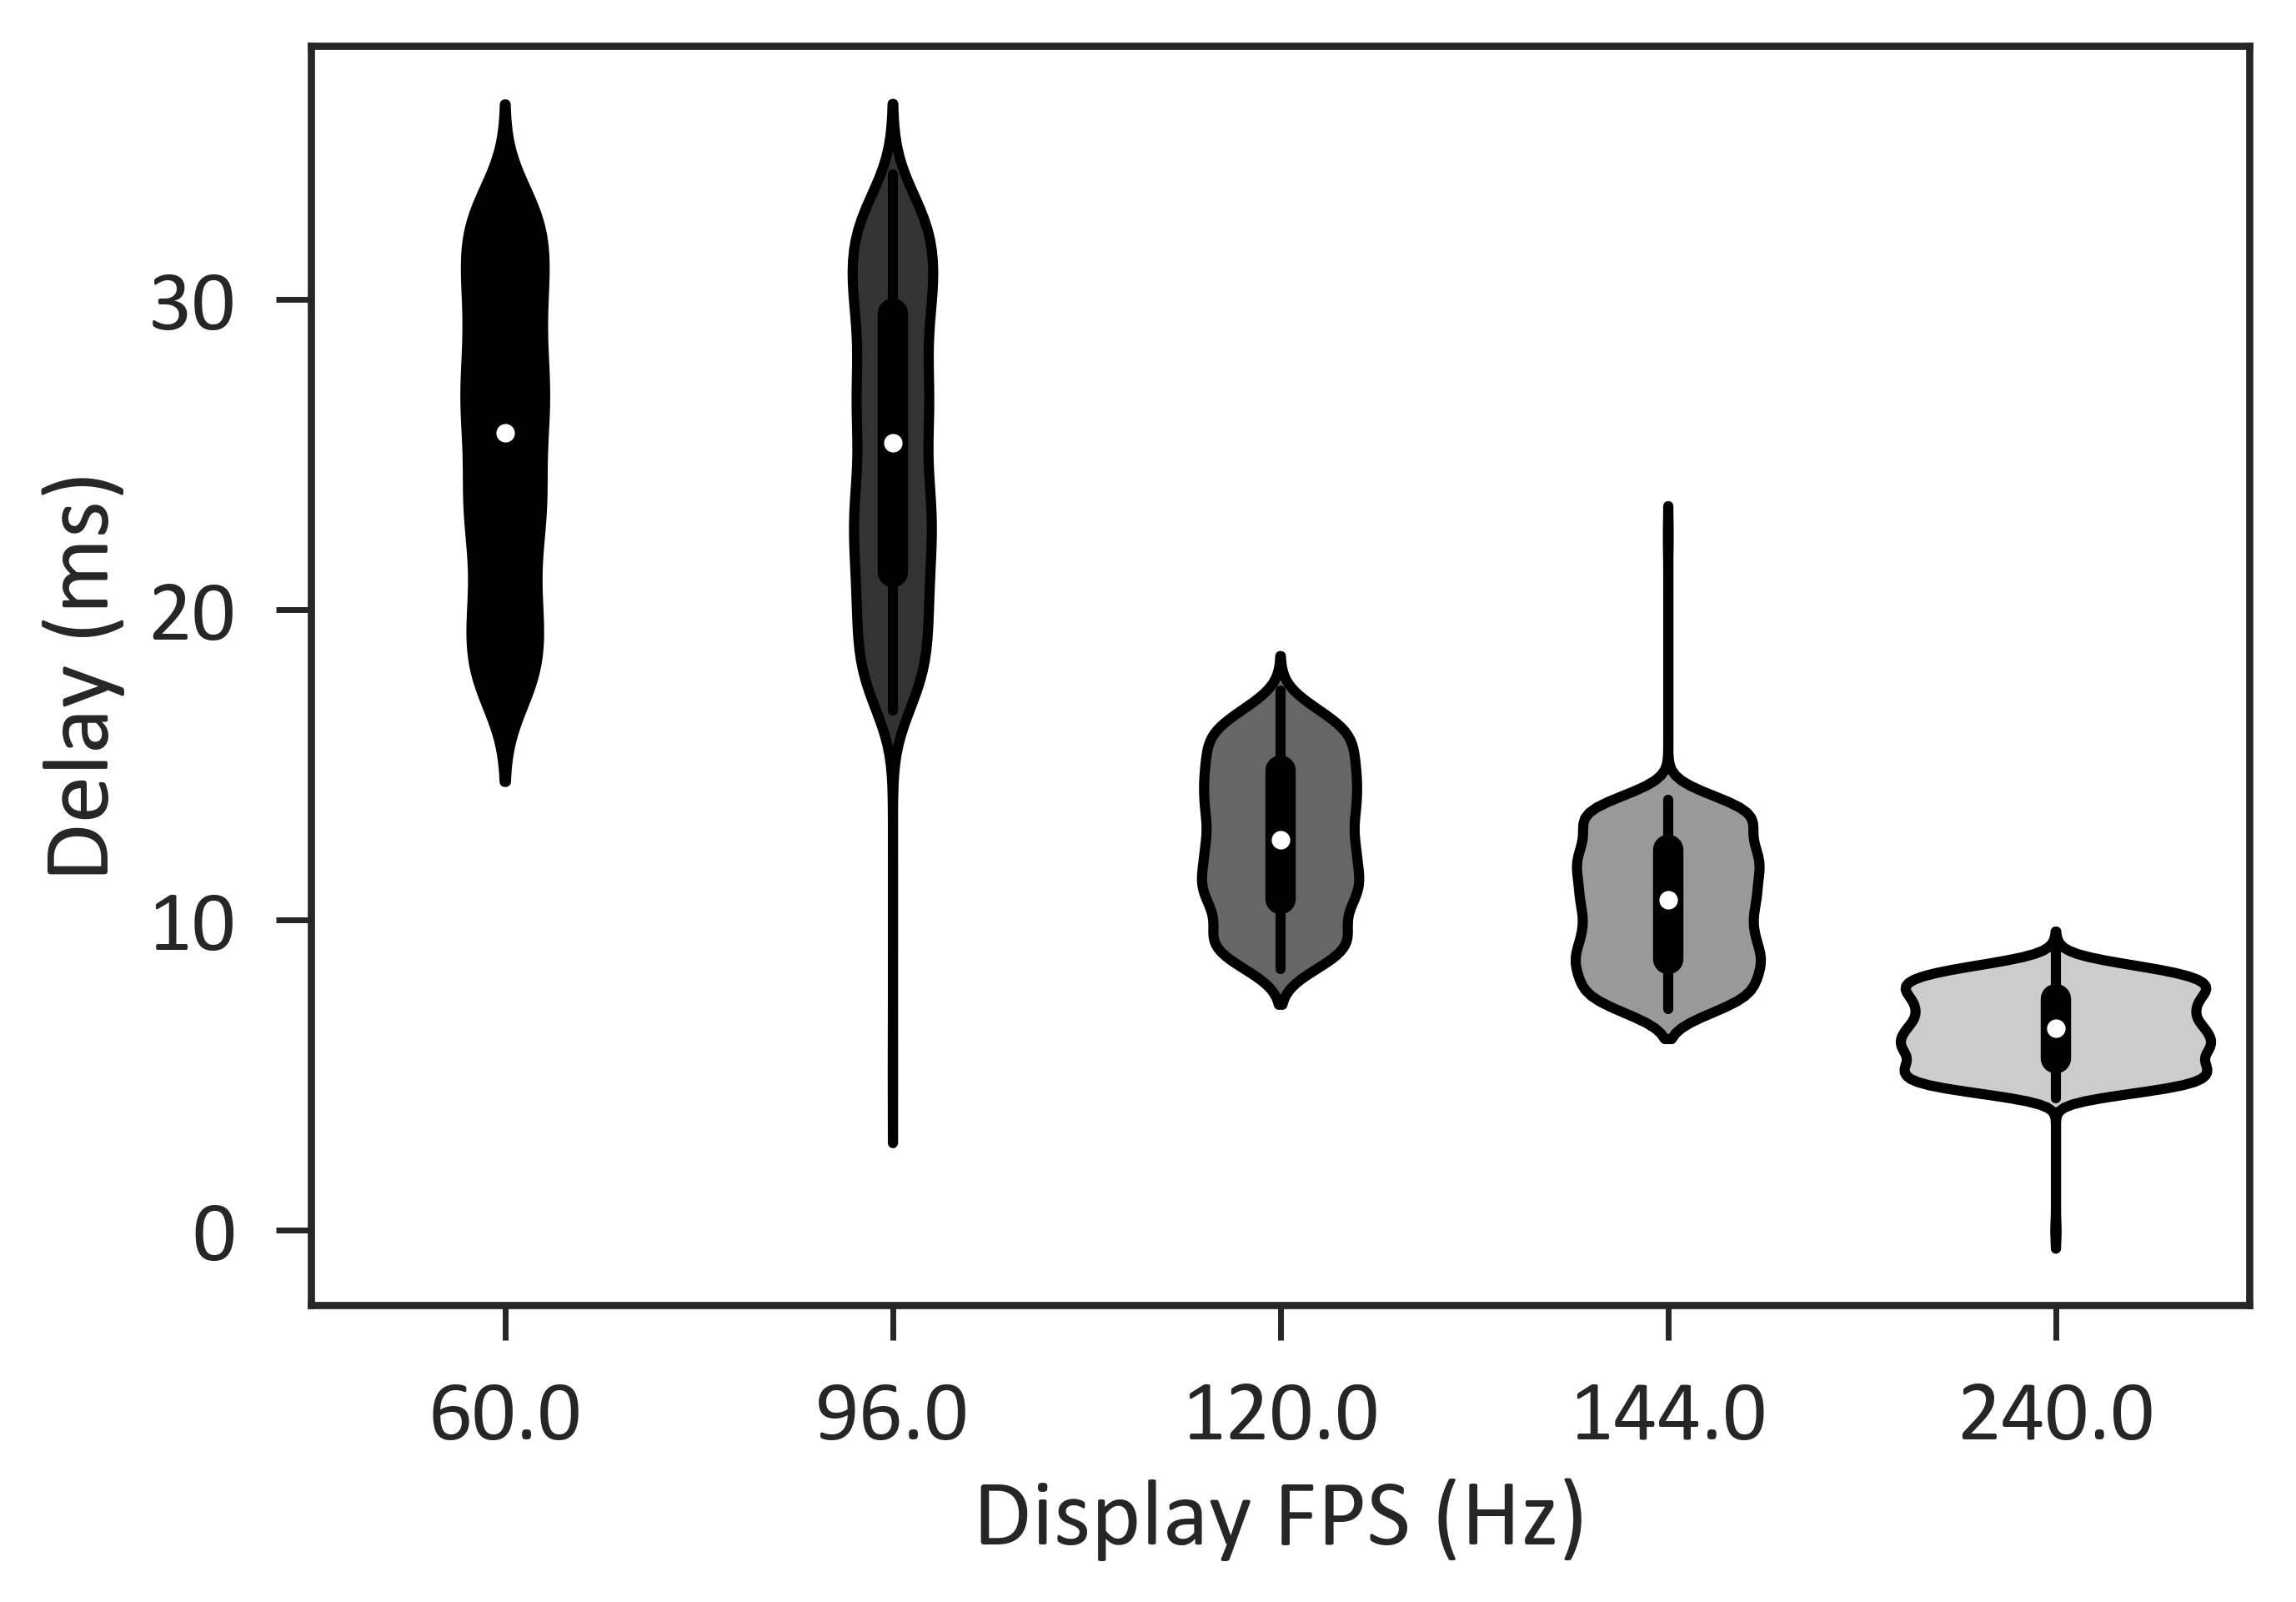

In [174]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=500)

sns.violinplot(x=latency_df.FPS, y=latency_df.latency, 
               palette=['0.','.2','.4','.6', '.8']).set(xlabel='Display FPS (Hz)', ylabel='Delay (ms)')
plt.savefig('fig_displayLatency_violin.png')

Fix the violin plot

In [181]:
latency_df.latency[(latency_df.FPS==96.0) & (latency_df.latency < 15.)] = np.nan
latency_df.latency[(latency_df.FPS==144.0) & (latency_df.latency > 15.)] = np.nan
latency_df.latency[(latency_df.FPS==240.0) & (latency_df.latency < 4.)] = np.nan

c:\users\mohammad bashiri\anaconda3\envs\neuron\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\mohammad bashiri\anaconda3\envs\neuron\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\mohammad bashiri\anaconda3\envs\neuron\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipyk

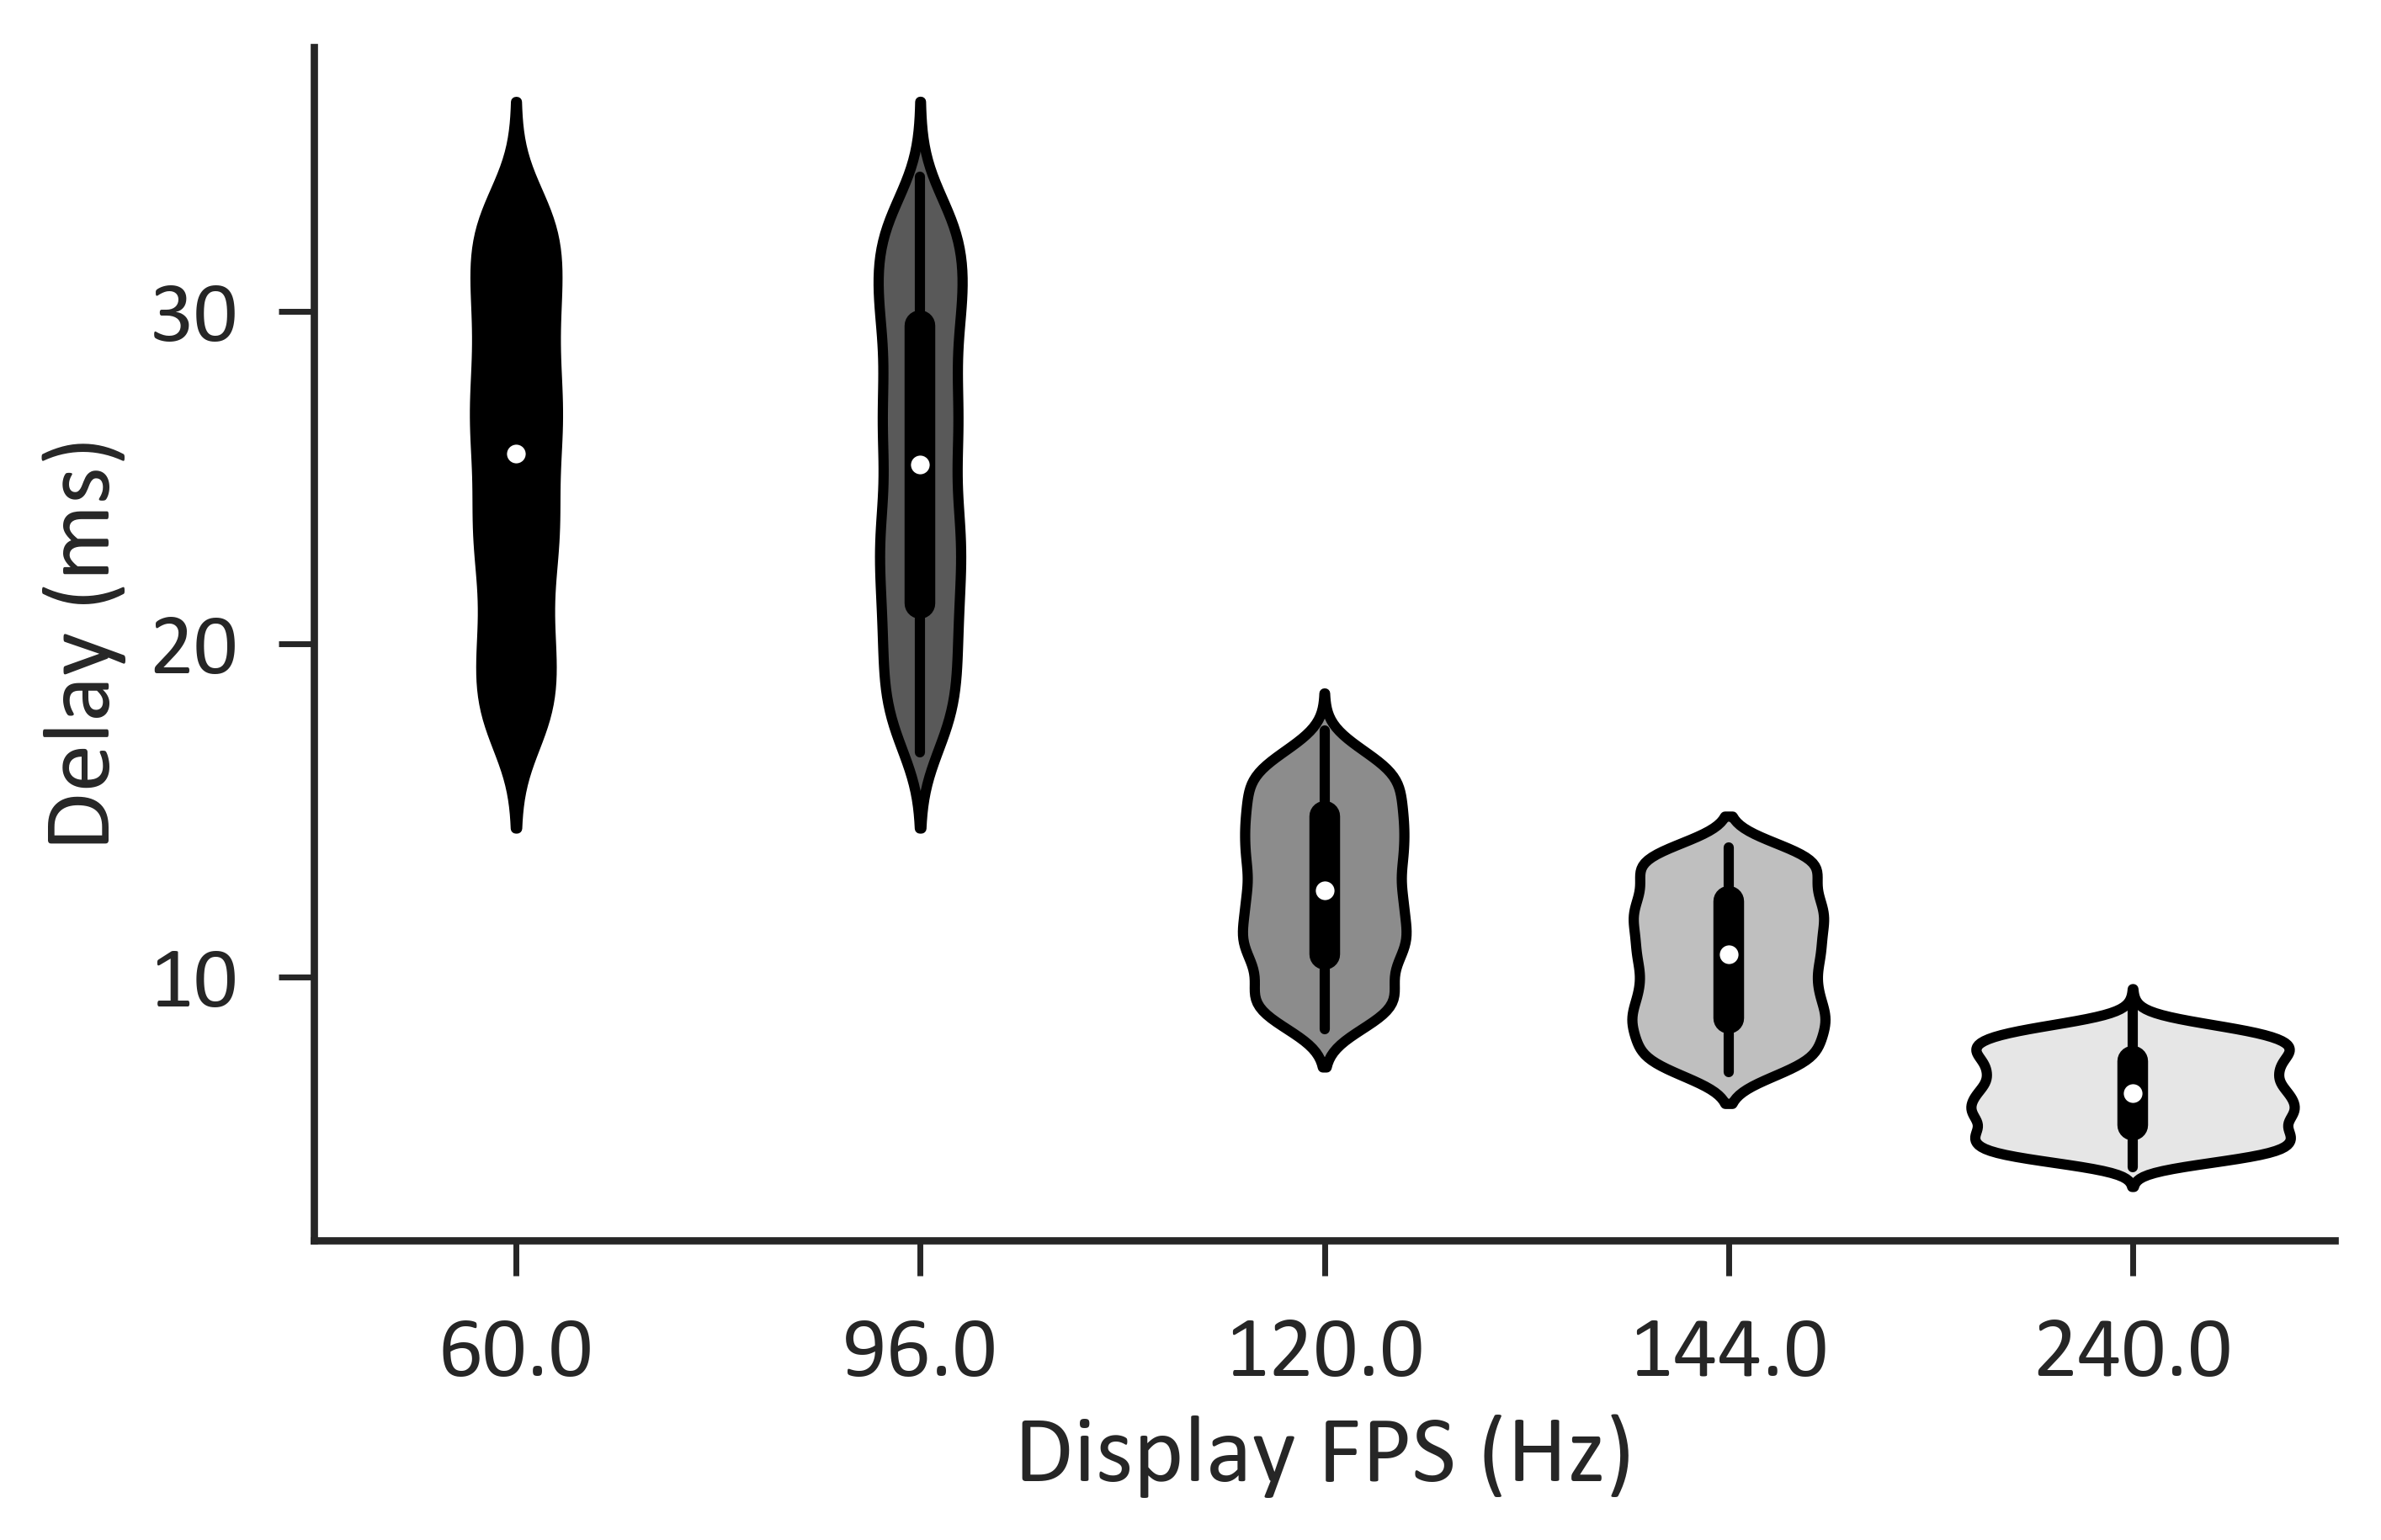

In [193]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=500)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

sns.violinplot(x=latency_df.FPS, y=latency_df.latency, 
               palette=['0.','.35','.55','.75', '.9']).set(xlabel='Display FPS (Hz)', ylabel='Delay (ms)')
plt.tight_layout()
plt.savefig('fig_displayLatency_violin.png')

### Spider plot

This is a plot that shows the mean of latency values per session

In [ ]:
groupedby_session = latency_df.groupby('session').mean().reset_index()

In [ ]:
groupedby_session.head()

In [ ]:
# get the latency mean values
values = groupedby_session.latency.tolist()
values

In [ ]:
values += values[:1]
values

In [ ]:
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

In [ ]:
plt.figure(figsize=(4,4), dpi=100)

# Initialise the spider plot
ax = plt.subplot(111, polar=True)
ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((1, 0.6, 0.6, .5))

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], FPS, color='black', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
 
# Plot data
ax.plot(angles, values, linewidth=5, linestyle='solid', alpha=.5)
 
# Fill area
ax.fill(angles, values, 'pink', alpha=0.5)


### Worst Results

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=500)
ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((0.8, 0.8, 0.8, .2))

sns.distplot(latency_df.latency[latency_df.FPS==60.], color='r').set(
    xlabel='Latency (ms)', ylabel='Probability of Occurance', xlim=[0, 60])

plt.savefig('fig_disp_worst.png')

### Best results

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=500)
ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((0.8, 0.8, 0.8, .2))

sns.distplot(latency_df.latency[latency_df.FPS==240.], color='r').set(
    xlabel='Latency (ms)', ylabel='Probability of Occurance', xlim=[0, 60])

plt.savefig('fig_disp_best.png')

# Figures for Total Latency

In [53]:
import sys
sys.path.append('../Pipeline/')
import plot_latency_hist as plh

Data Path

In [54]:
file_path = glob.glob(r'../Measurements/*.csv')

Samples DataFrame

In [55]:
samples_df = pd.DataFrame()

for ind, fname in enumerate(file_path):
    print(ind, fname, path.splitext(path.basename(fname))[0])

    # add the session column to this dataframe
    df = pd.read_csv(fname)
    df['session'] = [ind] * len(df)

    # put this in the master dataframe
    samples_df = pd.concat([samples_df, df], axis=0)

0 ../Measurements\s01_280218.csv s01_280218
1 ../Measurements\s02_280218.csv s02_280218
2 ../Measurements\s03_280218.csv s03_280218
3 ../Measurements\s04_280218.csv s04_280218
4 ../Measurements\s05_280218.csv s05_280218
5 ../Measurements\s06_280218.csv s06_280218
6 ../Measurements\s07_280218.csv s07_280218
7 ../Measurements\s08_280218.csv s08_280218
8 ../Measurements\s09_280218.csv s09_280218
9 ../Measurements\s10_280218.csv s10_280218
10 ../Measurements\s11_280218.csv s11_280218
11 ../Measurements\s12_280218.csv s12_280218
12 ../Measurements\s13_280218.csv s13_280218
13 ../Measurements\s14_280218.csv s14_280218
14 ../Measurements\s15_280218.csv s15_280218
15 ../Measurements\s16_280218.csv s16_280218
16 ../Measurements\s17_280218.csv s17_280218
17 ../Measurements\s18_280218.csv s18_280218
18 ../Measurements\s19_280218.csv s19_280218
19 ../Measurements\s20_280218.csv s20_280218
20 ../Measurements\s21_280218.csv s21_280218
21 ../Measurements\s22_280218.csv s22_280218
22 ../Measurements\s

Latency DataFrame

In [56]:
latency_df = pd.DataFrame()

for ind, fname in enumerate(file_path):
    print(ind, fname, path.splitext(path.basename(fname))[0])

    # create a dataframe of the latency and add it to the other dataframe
    df = pd.read_csv(fname)
    data_latency = plh.plot_latency_hist(df, return_data=True).values.reshape(-1)        

    dd = []
    dd.append(data_latency)        
    dd.append([ind] * len(data_latency))
    dd.append(np.arange(1, len(data_latency)+1))
    dd = np.array(dd).transpose()

    df_lat = pd.DataFrame(dd, 
                          columns=['latency', 'session', 'Trial'])
    latency_df = pd.concat([latency_df, df_lat], axis=0)
    latency_df.session = latency_df.session.astype(int)
    latency_df.Trial = latency_df.Trial.astype(int)

0 ../Measurements\s01_280218.csv s01_280218
1 ../Measurements\s02_280218.csv s02_280218
2 ../Measurements\s03_280218.csv s03_280218
3 ../Measurements\s04_280218.csv s04_280218
4 ../Measurements\s05_280218.csv s05_280218
5 ../Measurements\s06_280218.csv s06_280218
6 ../Measurements\s07_280218.csv s07_280218
7 ../Measurements\s08_280218.csv s08_280218
8 ../Measurements\s09_280218.csv s09_280218
9 ../Measurements\s10_280218.csv s10_280218
10 ../Measurements\s11_280218.csv s11_280218
11 ../Measurements\s12_280218.csv s12_280218
12 ../Measurements\s13_280218.csv s13_280218
13 ../Measurements\s14_280218.csv s14_280218
14 ../Measurements\s15_280218.csv s15_280218
15 ../Measurements\s16_280218.csv s16_280218
16 ../Measurements\s17_280218.csv s17_280218
17 ../Measurements\s18_280218.csv s18_280218
18 ../Measurements\s19_280218.csv s19_280218
19 ../Measurements\s20_280218.csv s20_280218
20 ../Measurements\s21_280218.csv s21_280218
21 ../Measurements\s22_280218.csv s22_280218
22 ../Measurements\s

### Violin Plot

[Text(0,0.5,'Delay (ms)'), Text(0.5,0,'Sessions')]

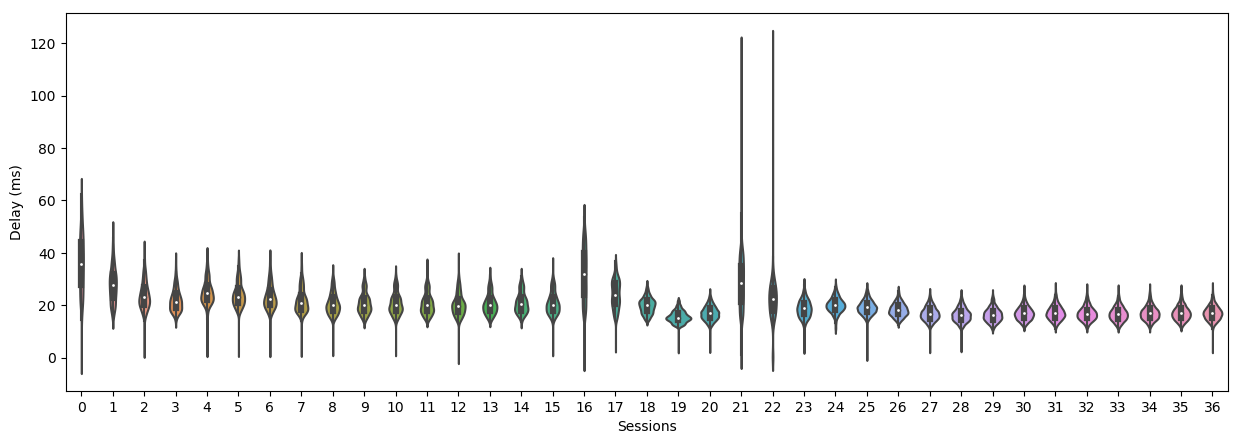

In [6]:
plt.figure(figsize=(15,5), dpi=100)
sns.violinplot(x=latency_df.session, y=latency_df.latency).set(xlabel='Sessions', ylabel='Delay (ms)')

remove some of the sessions

In [57]:
# np.in1d(latency_df.session.values, np.array([0,1,2]))
new_df = latency_df[~np.in1d(latency_df.session.values, np.array([18, 19, 20, 21, 22]))]

[Text(0,0.5,'Delay (ms)'), Text(0.5,0,'Sessions')]

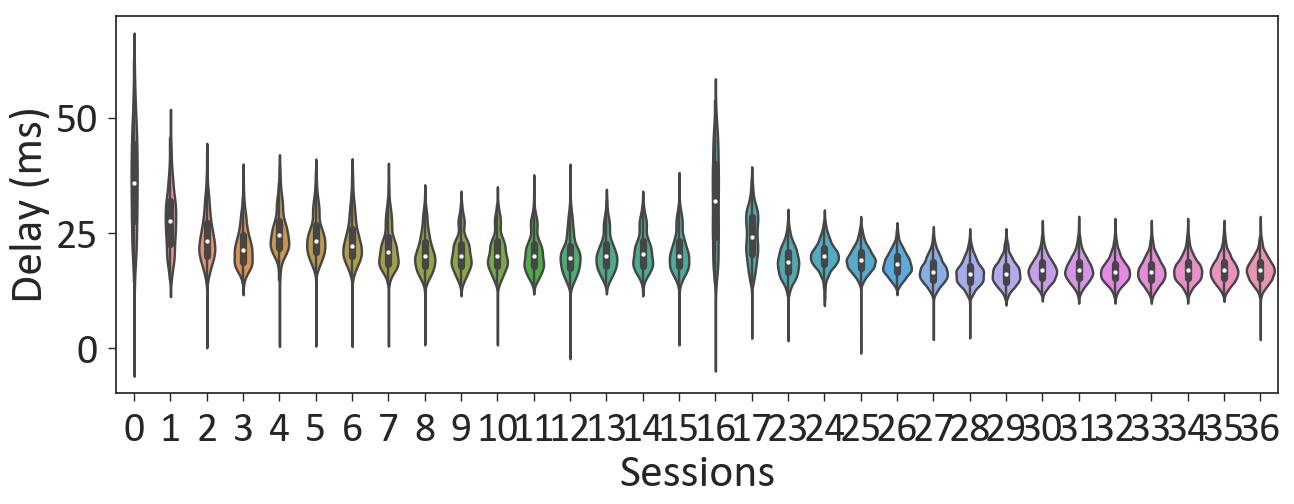

In [58]:
plt.figure(figsize=(15,5), dpi=100)
sns.violinplot(x=new_df.session, y=new_df.latency).set(xlabel='Sessions', ylabel='Delay (ms)')

In [59]:
new_df['Display_FPS'] = [0] * len(new_df)
new_df.Display_FPS[new_df.session<16] = 120
new_df.Display_FPS[new_df.session>=16] = 240
new_df.session[new_df.session == 16] = 0
new_df.session[new_df.session == 17] = 1
new_df.session[new_df.session > 17] -= 21

c:\users\mohammad bashiri\anaconda3\envs\neuron\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\mohammad bashiri\anaconda3\envs\neuron\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\mohammad bashiri\anaconda3\envs\neuron\lib\site-packages\pandas\core\generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

[Text(0,0.5,'Delay (ms)'), Text(0.5,0,'Sessions')]

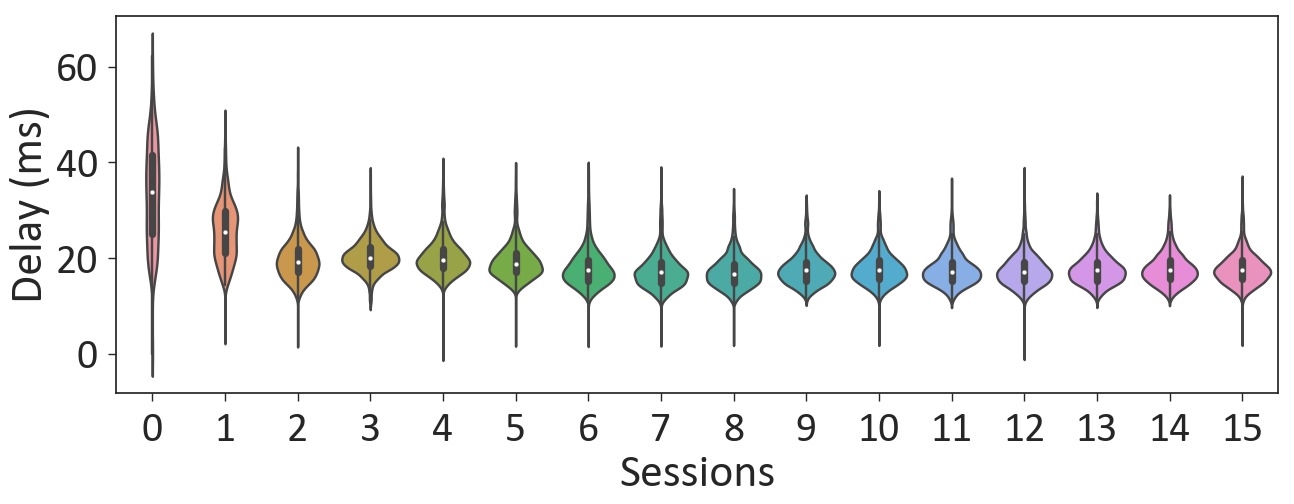

In [60]:
plt.figure(figsize=(15,5), dpi=100)
sns.violinplot(x=new_df.session, y=new_df.latency).set(xlabel='Sessions', ylabel='Delay (ms)')

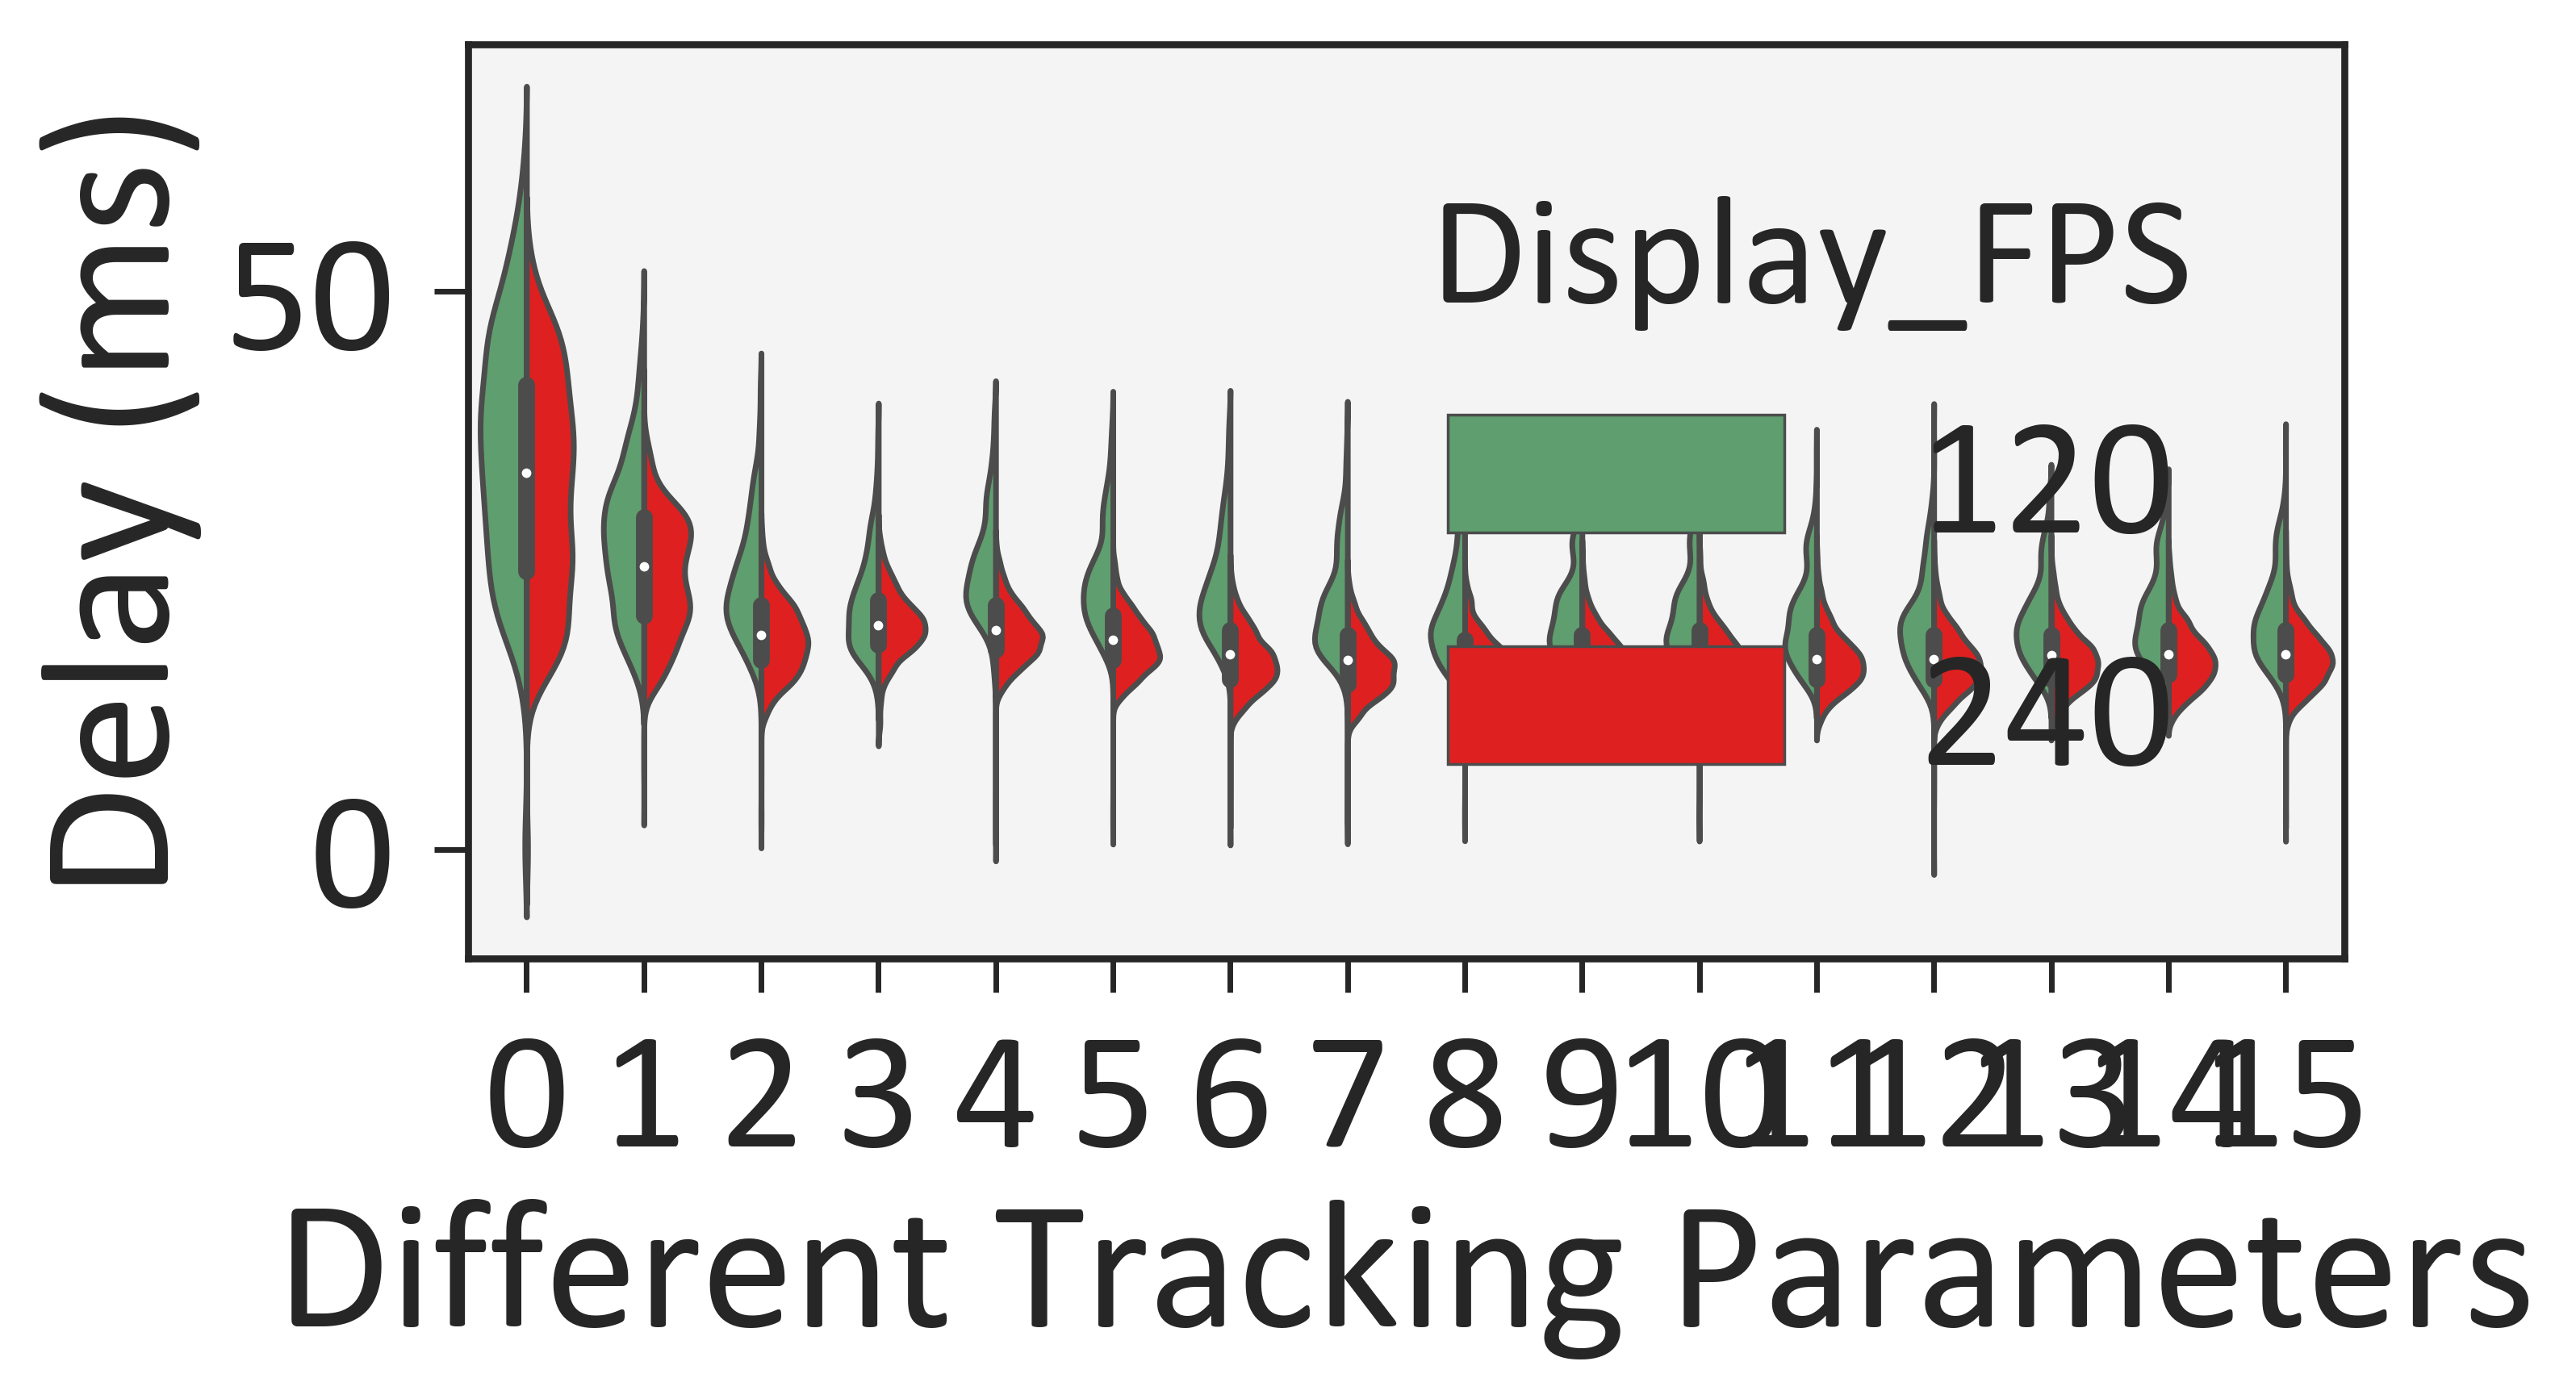

In [61]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=500)
# sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x="session", y="latency", hue="Display_FPS", data=new_df, split=True,
               palette={120: "g", 240: "red"}, linewidth=1).set(
               xlabel='Different Tracking Parameters', ylabel='Delay (ms)')

ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((0.8, 0.8, 0.8, .2))

# plt.savefig('fig_total_violin.png')

### Line Plots

In [62]:
# fig, ax = plt.subplots(figsize=(6, 3), dpi=500)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.grid(False)

# df = new_df.groupby(('Display_FPS', 'session')).latency.mean().reset_index()
# plt.plot(df[df.Display_FPS == 120].latency.values, label='120 Hz Display')
# plt.plot(df[df.Display_FPS == 240].latency.values, label='240 Hz Display')

# plt.legend()
# plt.xlabel('Tracking Prameters')
# plt.ylabel('Delay (ms)')
# # plt.show()
# plt.savefig('fig_tot_all.png')

In [63]:
new_df['Tracking_FPS'] = [0] * len(new_df)
new_df.Tracking_FPS[new_df.session==0] = 30
new_df.Tracking_FPS[new_df.session==1] = 60
new_df.Tracking_FPS[new_df.session==2] = 120
new_df.Tracking_FPS[np.in1d(new_df.session, np.arange(3,16))] = 240

c:\users\mohammad bashiri\anaconda3\envs\neuron\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\mohammad bashiri\anaconda3\envs\neuron\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\mohammad bashiri\anaconda3\envs\neuron\lib\site-packages\pandas\core\generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

In [78]:
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'white'}, font_scale=4, font='calibri',
        style="ticks", color_codes=True)

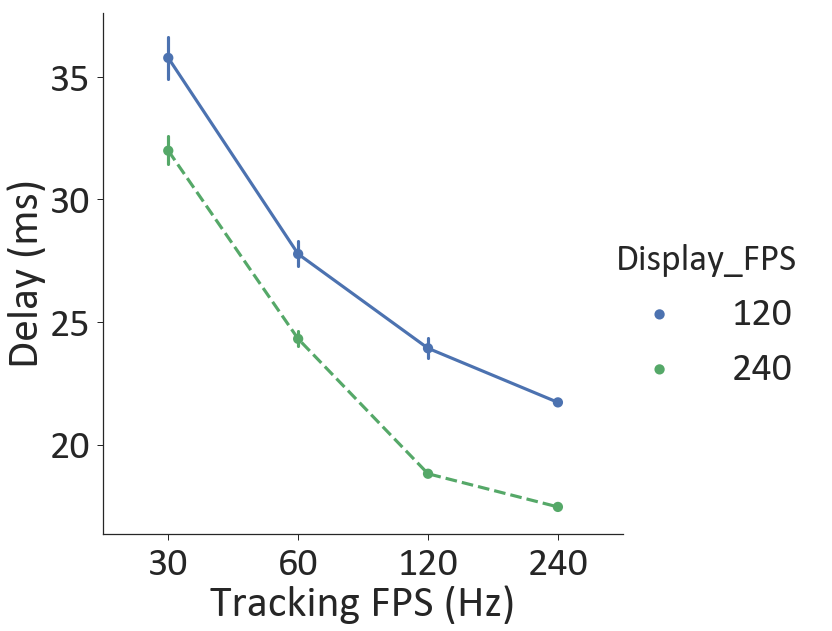

In [81]:
plt.figure(figsize=(10,5))
sns.factorplot(data=new_df, x='Tracking_FPS', y='latency', hue='Display_FPS', 
               size=10, aspect=1,  linestyles=["-", "--"])

plt.xlabel('Tracking FPS (Hz)')
plt.ylabel('Delay (ms)')
plt.grid('off')
plt.savefig('fig_tot_all.png')

### Both case

120 Hz, session 0

In [120]:
sns.set(rc={'axes.facecolor':'w', 'figure.facecolor':'white'}, font_scale=1.5, font='calibri',
        style="ticks", color_codes=True)
# sns.plotting_context(font_scale=1.5)

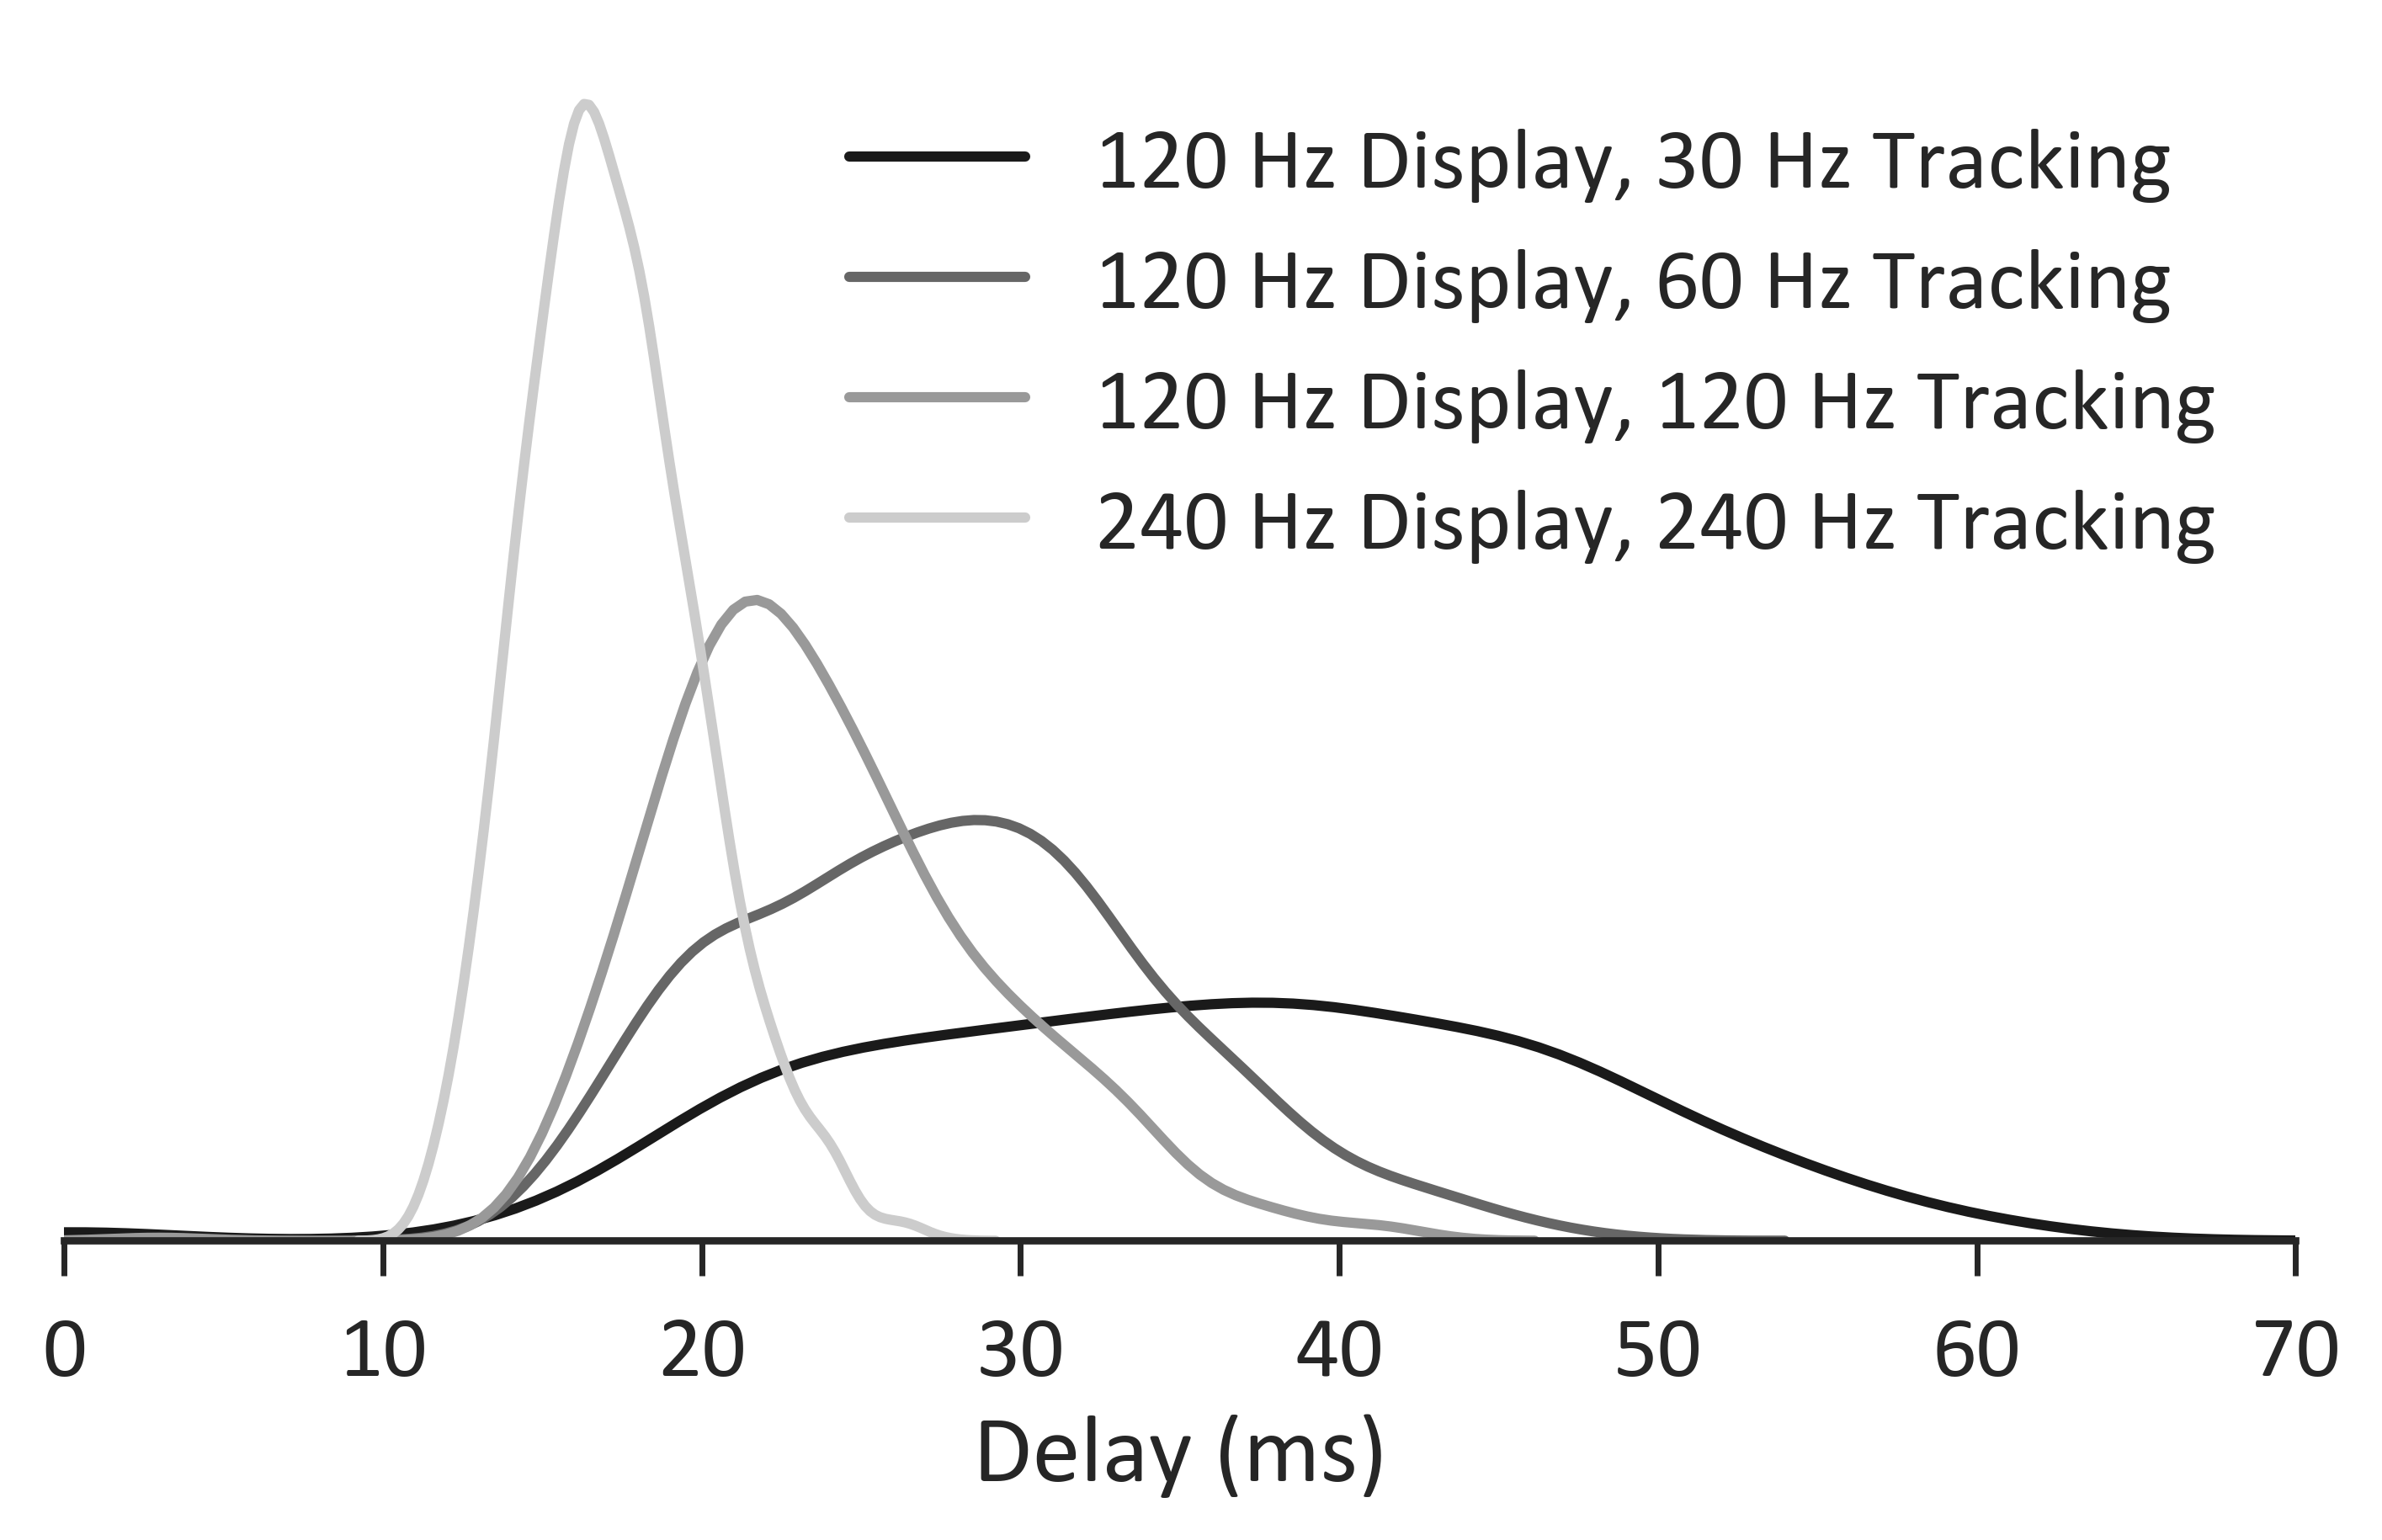

In [157]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=500)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

sns.distplot(new_df.latency[(new_df.Display_FPS==120) & (new_df.session==0)], 
             color=".1", hist=False, label='120 Hz Display, 30 Hz Tracking')

sns.distplot(new_df.latency[(new_df.Display_FPS==120) & (new_df.session==1)], 
             color=".4", hist=False, label='120 Hz Display, 60 Hz Tracking')

sns.distplot(new_df.latency[(new_df.Display_FPS==120) & (new_df.session==2)], 
             color=".6", hist=False, label='120 Hz Display, 120 Hz Tracking')

sns.distplot(new_df.latency[(new_df.Display_FPS==240) & (new_df.session==10)], 
             color=".8", hist=False, label='240 Hz Display, 240 Hz Tracking')

plt.yticks([], [])
ax.grid(False)
plt.xlabel('Delay (ms)')
plt.xlim([0, 70])
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.tight_layout()

plt.savefig('fig_total_dist.png')

## Distributions for the two display 

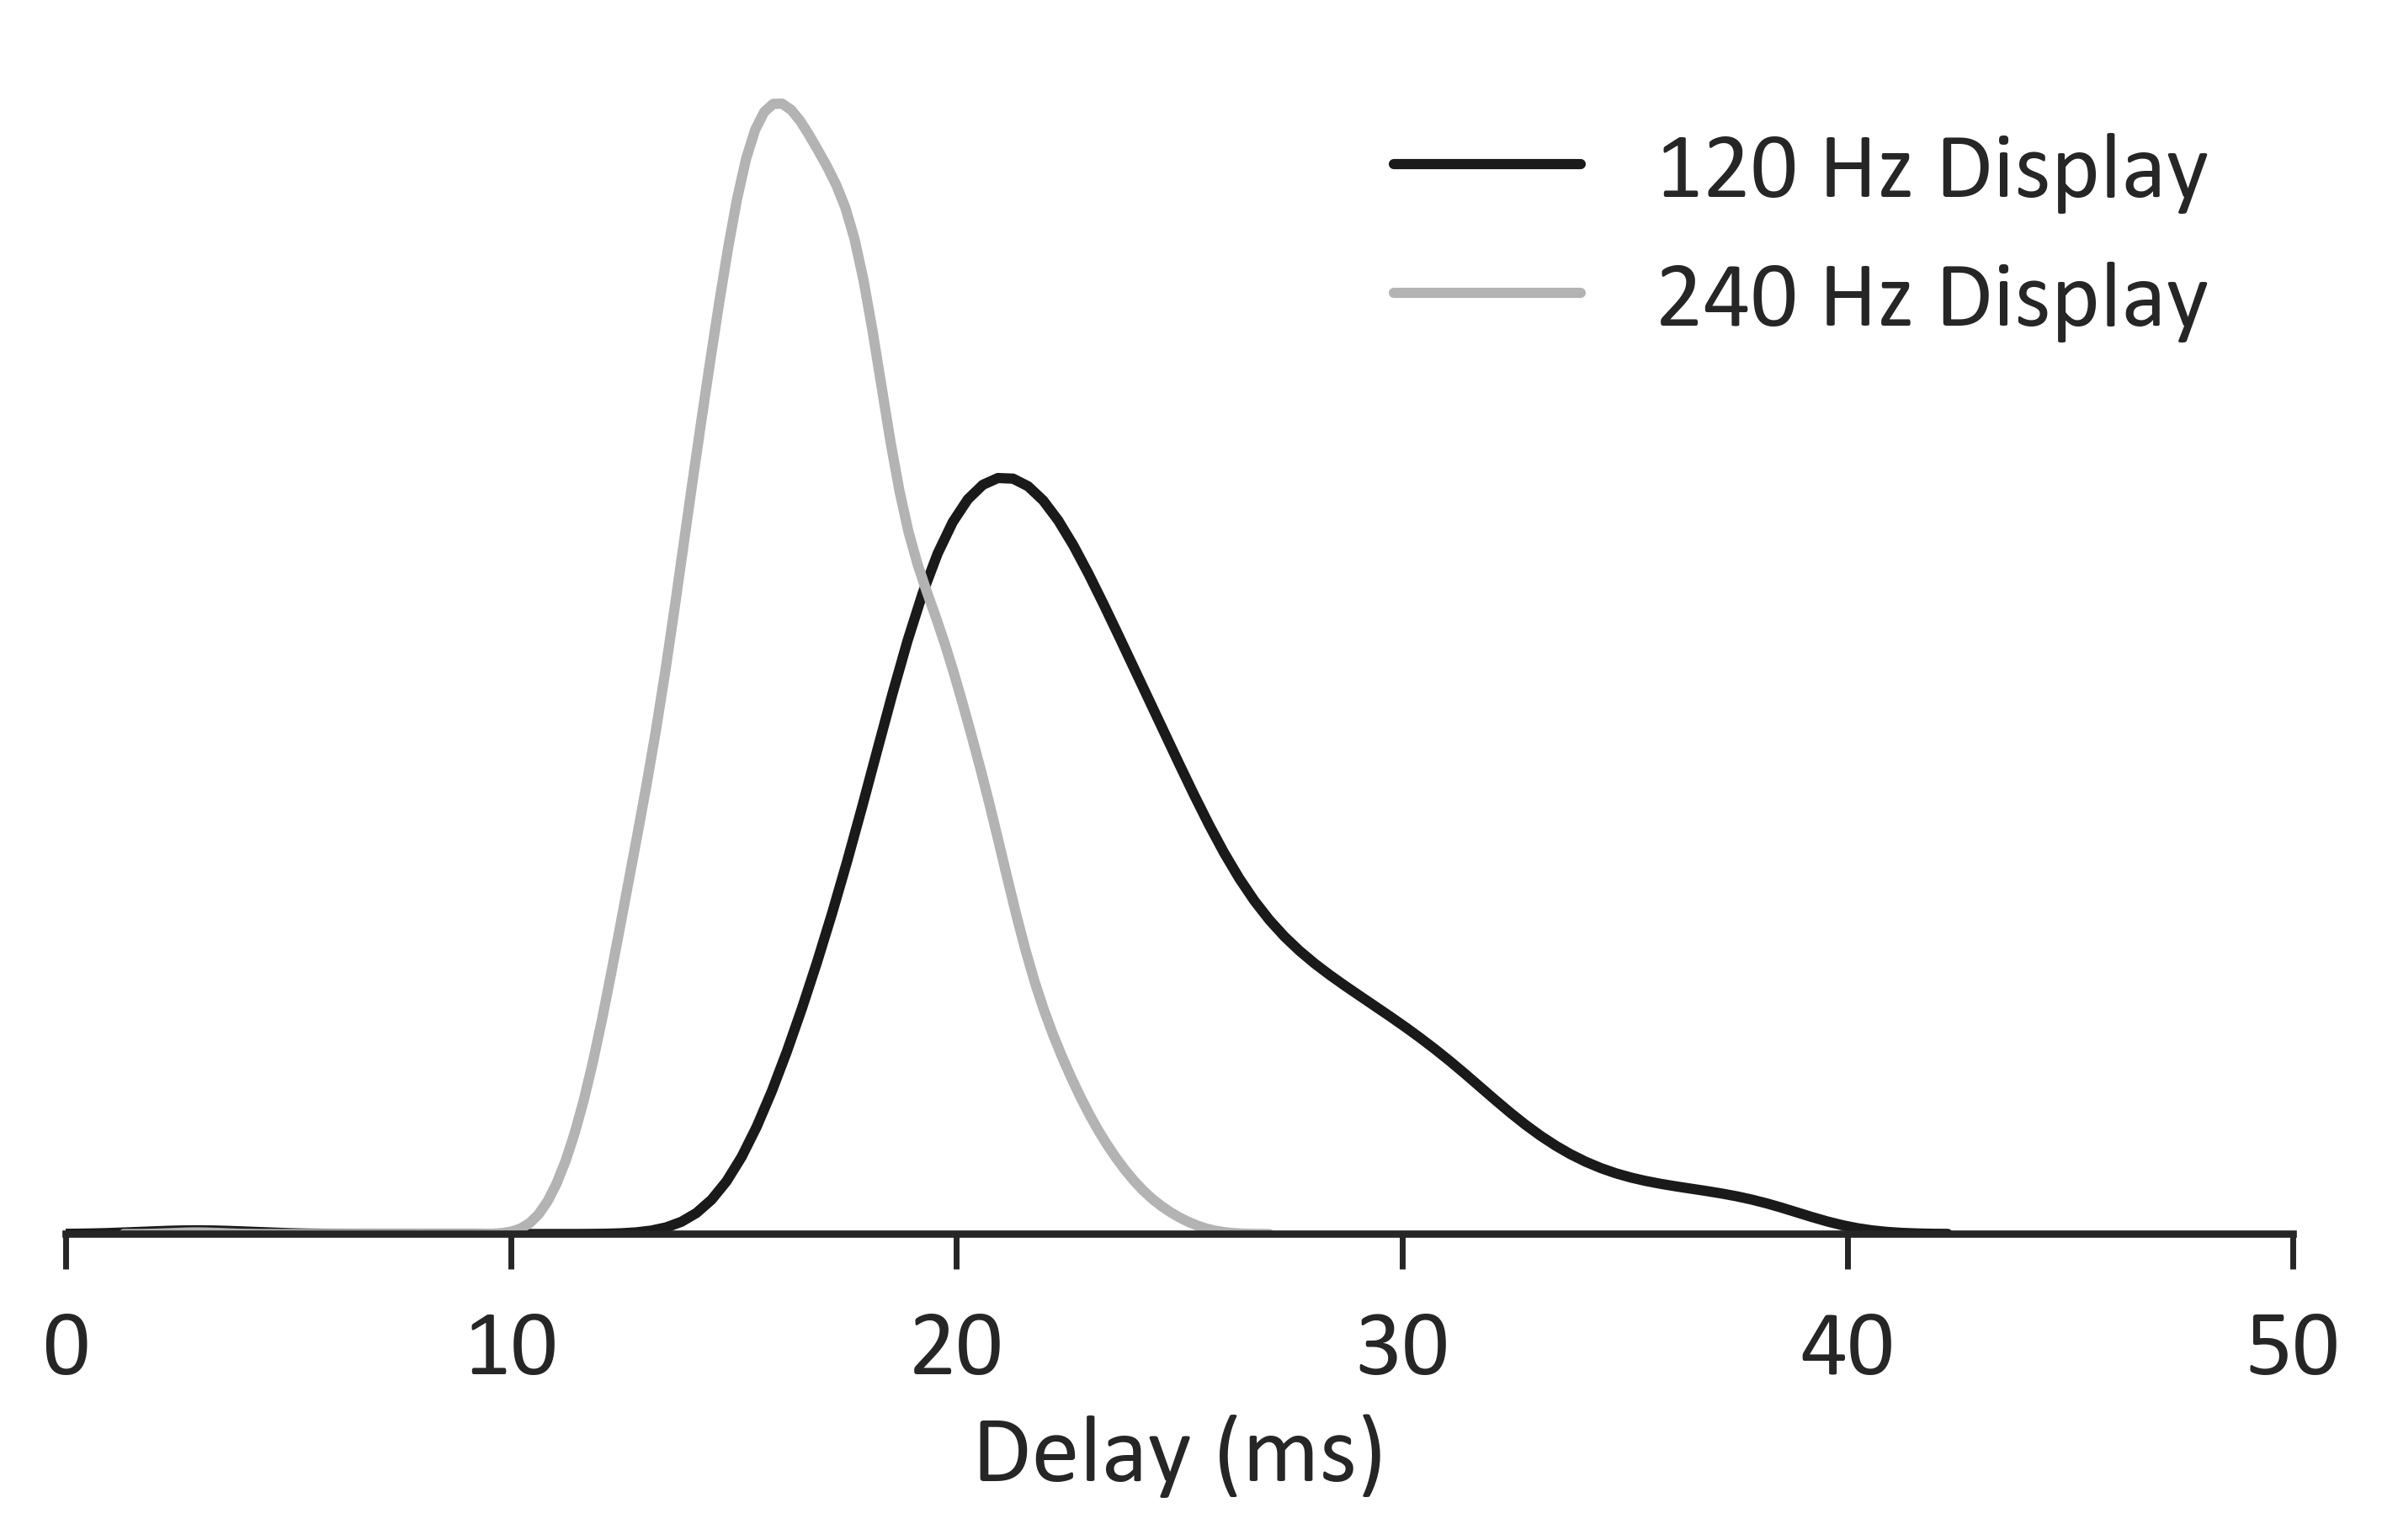

In [156]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=500)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

sns.distplot(new_df.latency[(new_df.Display_FPS==120) & (new_df.session==6)], 
             color=".1", hist=False, label='120 Hz Display')

sns.distplot(new_df.latency[(new_df.Display_FPS==240) & (new_df.session==6)], 
             color=".7", hist=False, label='240 Hz Display')

plt.yticks([], [])
ax.grid(False)
plt.xlabel('Delay (ms)')
plt.xlim([0, 50])
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()

plt.savefig('fig_track_dist.png')

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Merging two dataframes with unequal size

In [ ]:
myarr = np.random.random((10,3))
df = pd.DataFrame(myarr,
                  columns=['A', 'B', 'C'])

df.index = np.arange(10,20)
df

In [ ]:
new_df = pd.DataFrame(np.arange(10,15), 
                      columns=['lat'])

In [ ]:
df = pd.concat([df, new_df], axis=1)

In [ ]:
df

## repeating the same element in a column

In [ ]:
session = 's01_280318'
lat = np.arange(10,15)

dd = []
dd.append(lat)
dd.append([session] * len(lat))
dd = np.array(dd).transpose()

new_df = pd.DataFrame(dd, 
                      columns=['lat', 'session'])

In [ ]:
new_df

### Adding the dataframe (wit repeated element) to another, with unequal size

In [ ]:
myarr = np.random.random((10,3))
df = pd.DataFrame(myarr,
                  columns=['A', 'B', 'C'])

session = 2 # ind
df['session'] = [2] * len(df)

df.index = np.arange(10,20)
df

In [ ]:
filename = 's01_280318'
lat = np.arange(10,15)

dd = []
dd.append(lat)
dd.append([filename] * len(lat))
dd = np.array(dd).transpose()

new_df = pd.DataFrame(dd, 
                      columns=['lat', 'session'])

new_df

In [ ]:
new_df.index = df.index[:len(new_df)]

very_new_df = pd.concat([df, new_df], axis=1)
very_new_df

In [ ]:
dtf = pd.DataFrame()

In [ ]:
dd

In [ ]:
df['Tracking_FPS'] = [0] * len(df)

In [ ]:
df.Tracking_FPS[df.session==0] = 30
df.Tracking_FPS[df.session==1] = 60
df.Tracking_FPS[df.session==2] = 120
df.Tracking_FPS[np.in1d(df.session, np.arange(3,16))] = 240